### 策略梯度方法
#### 倒立摆环境 REINFORCE算法
倒立摆控制环境
Cart Pole即车杆游戏，游戏模型如下图所示。游戏里面有一个小车，上有竖着一根杆子，每次重置后的初始状态会有所不同。小车需要左右移动来保持杆子竖直，为了保证游戏继续进行需要满足以下两个条件：

杆子倾斜的角度$\theta$不能大于15°

小车移动的位置$x$需保持在一定范围（中间到两边各2.4个单位长度）

动作（action）：
- 左移（0）
- 右移（1）

状态变量（state variables）：
- $x$ ：小车在轨道上的位置（position of the cart on the track）
- $\theta$ ：杆子与竖直方向的夹角（angle of the pole with the vertical）
- $\dot{x}$ ：小车速度（cart velocity）
- $\dot{\theta}$ ：角度变化率（rate of change of the angle）

游戏奖励（reward）：

在gym的Cart Pole环境（env）里面，左移或者右移小车的action之后，env会返回一个+1的reward。其中CartPole-v0中到达200个reward之后，游戏也会结束，而CartPole-v1中则为500。最大奖励（reward）阈值可通过前面介绍的注册表进行修改。

In [1]:
import gym
import torch
from RL_algo.model_free.policy_based import Policy_gradient as PG
import warnings
warnings.filterwarnings("ignore")

Iteration 9: 100%|██████████| 100/100 [00:26<00:00,  3.81it/s, episode=1000, return=156.800]


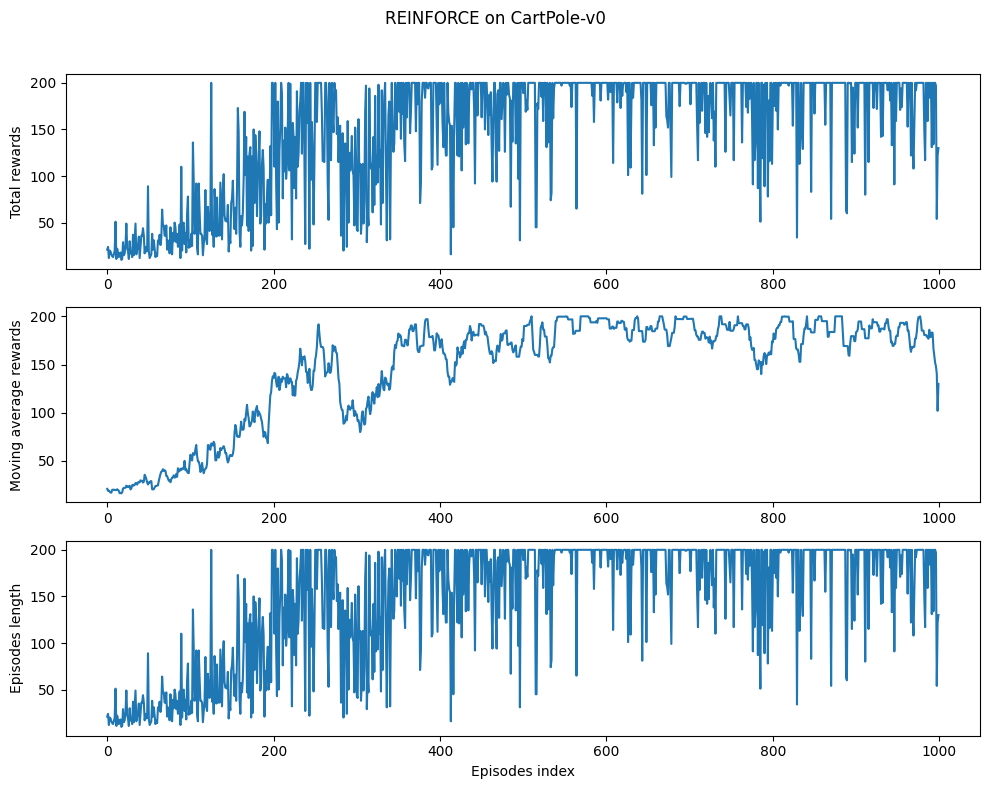

In [2]:
learning_rate = 1e-3
num_episodes = 1000
hidden_dim = [128]
gamma = 0.98
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

env_name = "CartPole-v0"
env = gym.make(env_name)
env.reset(seed=0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = PG.REINFORCE(state_dim, action_dim, hidden_dim, learning_rate, gamma, device, num_episodes, env)
agent.run_REINFORCE()

In [3]:
def run_trained_agent(env, agent, num_episodes=5):
    for i in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            env.render() 
            action = agent.take_action(state)  # 使用训练好的智能体选择动作
            next_state, reward, done, _ = env.step(action)
            state = next_state
            total_reward += reward
        print(f"Episode {i + 1}: Total Reward: {total_reward}")
    env.close()

run_trained_agent(env, agent)

Episode 1: Total Reward: 24.0
Episode 2: Total Reward: 108.0
Episode 3: Total Reward: 200.0
Episode 4: Total Reward: 200.0
Episode 5: Total Reward: 200.0
